# Instalando o Pycaret

In [43]:
#!pip install pycaret

In [44]:
#!pip install scipy

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import shap
from pycaret.regression import *
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Tratando a base

In [46]:
df= pd.read_excel("Base_novo_teste.xlsx")

In [47]:
df = df[['cod_municipio_ibge','qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','pop_total','total_sim_tecnologia','porte_municipio']]

In [48]:
df.head()

,cod_municipio_ibge,qtd_abertas_Empresario_Individual,Mecanismos_incentivo,Reducao_IPTU,Isencao_IPTU,Reducao_ISSQN,Isencao_ISSQN,Isencao_Tx,Cessao_terrenos,Doacao_terrenos,...,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,media_NU_NOTA_REDACAO,valor_medio_recebido_familia,pib_per_capita_preco_corrente,perc_20_59_anos,pop_total,total_sim_tecnologia,porte_municipio
0,110001,194,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,504.034091,491.079545,543.558537,621.363636,18495,25091.18,0.587227,22516,18.0,2
1,110002,1275,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,...,495.727950,484.710248,518.811149,584.534161,17615,25730.20,0.591797,111148,12.0,4
2,110003,49,Sim,Não,Não,Não,Sim,Não,Não,Não,...,486.071429,447.628571,522.883333,471.428571,18956,32226.25,0.584567,5067,8.0,1
3,110004,1258,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,...,505.006061,490.991919,533.458933,611.717172,19376,29331.29,0.595584,86416,17.0,3
4,110005,257,Sim,Não,Sim,Não,Não,Não,Não,Não,...,477.045714,454.722857,480.696875,576.571429,17752,37069.25,0.598272,16088,8.0,2


In [49]:
df['qtd_cursos_engenharias'] = df['qtd_cursos_engenharias'].fillna(0)

df['qtd_cursos_negocios_direito'] = df['qtd_cursos_negocios_direito'].fillna(0)

df['total_sim_tecnologia'] = df['total_sim_tecnologia'].fillna(0)

df['taxa_homicidio'] = df['taxa_homicidio'].fillna(0)

df['RH_adm_dir'] = df['RH_adm_dir'].fillna(0)

In [50]:
df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [51]:
df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [52]:
df = pd.get_dummies(df, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [53]:
df = df[np.isfinite(df).all(1)]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cod_municipio_ibge                 5570 non-null   int64  
 1   qtd_abertas_Empresario_Individual  5570 non-null   int64  
 2   taxa_homicidio                     5570 non-null   float64
 3   RH_adm_dir                         5570 non-null   float64
 4   densidade_banda_larga              5570 non-null   float64
 5   densidade_telefonia_movel          5570 non-null   float64
 6   qtd_cursos_engenharias             5570 non-null   float64
 7   qtd_cursos_negocios_direito        5570 non-null   float64
 8   media_notas_CN                     5570 non-null   float64
 9   media_notas_CH                     5570 non-null   float64
 10  media_NU_NOTA_LC                   5570 non-null   float64
 11  media_NU_NOTA_MT                   5570 non-null   float

In [56]:
df = df.set_index('cod_municipio_ibge')

# Dividindo em treino e test

Adaleny, fiz a divisão de treino e teste baseado na estratificação

In [64]:
treino = df.groupby('porte_municipio', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state = 123))

teste = df.drop(treino.index)

print(treino.shape, teste.shape)

(4178, 31) (1392, 31)


In [10]:
# vamos separar duas bases, uma para treino e outra para teste
#treino = df.sample(frac=.8, random_state=123)
#treino.reset_index(inplace=True, drop=True)


#teste = df.drop(treino.index)
#teste.reset_index(inplace=True, drop=True)

#print(treino.shape, teste.shape)

#peguei esse do colab que compartilhou comigo, depois queria entender a formatação dele

(4456, 31) (1114, 31)


In [65]:
treino = treino.drop('porte_municipio', axis = 1)
teste= teste.drop('porte_municipio', axis = 1)

In [61]:
#teste= teste.drop('qtd_abertas_Empresario_Individual', axis = 1)

In [68]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 110005 to 522230
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   qtd_abertas_Empresario_Individual  1392 non-null   int64  
 1   taxa_homicidio                     1392 non-null   float64
 2   RH_adm_dir                         1392 non-null   float64
 3   densidade_banda_larga              1392 non-null   float64
 4   densidade_telefonia_movel          1392 non-null   float64
 5   qtd_cursos_engenharias             1392 non-null   float64
 6   qtd_cursos_negocios_direito        1392 non-null   float64
 7   media_notas_CN                     1392 non-null   float64
 8   media_notas_CH                     1392 non-null   float64
 9   media_NU_NOTA_LC                   1392 non-null   float64
 10  media_NU_NOTA_MT                   1392 non-null   float64
 11  media_NU_NOTA_REDACAO              1392 non-null 

# Pycaret

## Setup

In [69]:
regression_setup = setup(data = treino, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

,Description,Value
0,Session id,42
1,Target,qtd_abertas_Empresario_Individual
2,Target type,Regression
3,Original data shape,"(4178, 30)"
4,Transformed data shape,"(4178, 30)"
5,Transformed train set shape,"(2924, 30)"
6,Transformed test set shape,"(1254, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


## Comparando Modelos 

### Usando MAPE

In [71]:
best_model = compare_models(sort = 'RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,138.3505,366711.5141,578.1140,0.9485,0.6986,0.7208,0.2320
omp,Orthogonal Matching Pursuit,222.3184,1304406.5691,947.6668,0.9245,1.1778,2.6551,0.1760
br,Bayesian Ridge,181.8900,1662429.6217,1095.5381,0.9077,0.9878,1.7161,0.1920
en,Elastic Net,184.2287,1682806.6179,1101.8769,0.9066,0.9739,1.7860,0.1800
lasso,Lasso Regression,188.2600,1694558.2085,1105.2548,0.9062,1.0163,1.8654,0.1920
lr,Linear Regression,190.6498,1698940.5667,1107.4096,0.9059,1.0306,1.9074,0.1780
llar,Lasso Least Angle Regression,188.5823,1699738.0201,1107.5502,0.9060,1.0167,1.8677,0.1740
ridge,Ridge Regression,190.2026,1700217.5749,1107.8158,0.9059,1.0278,1.8979,0.1780
lar,Least Angle Regression,242.1325,2320353.7934,1303.3717,0.8385,1.1269,2.3803,0.1720
par,Passive Aggressive Regressor,263.7175,4149630.2259,1461.4602,0.8621,1.0355,1.7923,0.1780


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [72]:
# verificando os hiperparâmetros do modelo 

print(best_model)

HuberRegressor()


In [73]:
best_model = create_model('huber', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,141.8830,353570.7113,594.6181,0.9850,0.7202,0.6571
1,152.2660,373452.7730,611.1078,0.8825,0.6260,0.5953
2,150.8734,512538.5771,715.9180,0.9430,0.7083,0.7101
3,89.4697,55167.1622,234.8769,0.9366,0.6656,0.6878
4,157.2604,538828.3469,734.0493,0.9955,0.7731,0.9538
Mean,138.3505,366711.5141,578.1140,0.9485,0.6986,0.7208
Std,24.9394,172143.9775,180.2656,0.0402,0.0499,0.1227


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Plotando alguns graficos 

In [136]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

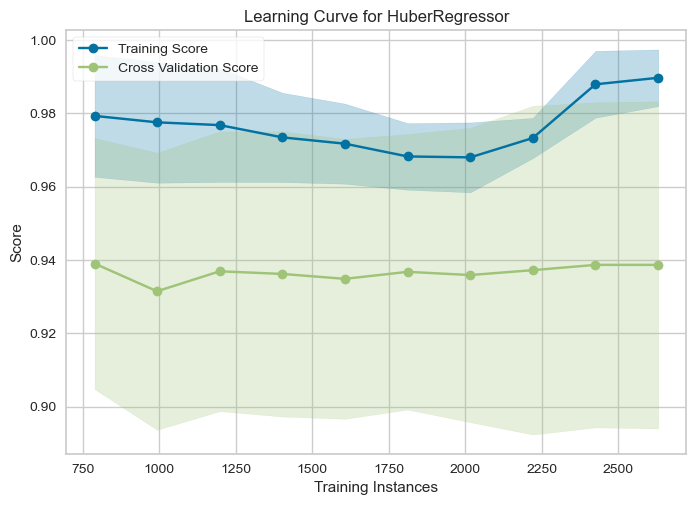

In [74]:
plot_model(best_model, plot = 'learning')

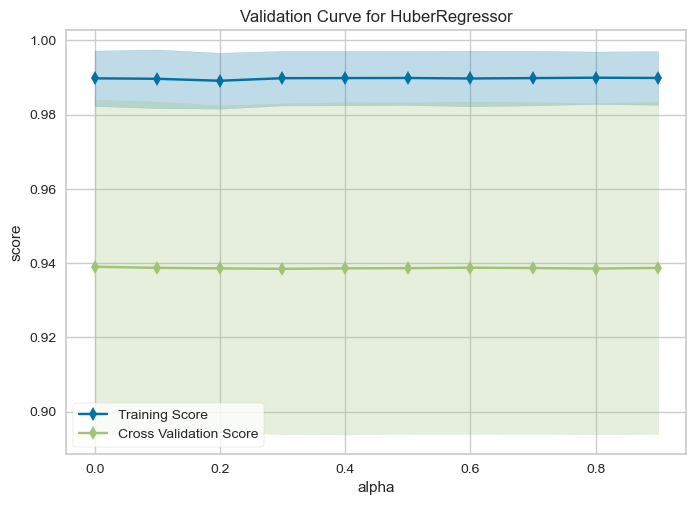

In [75]:
plot_model(best_model, plot='vc')

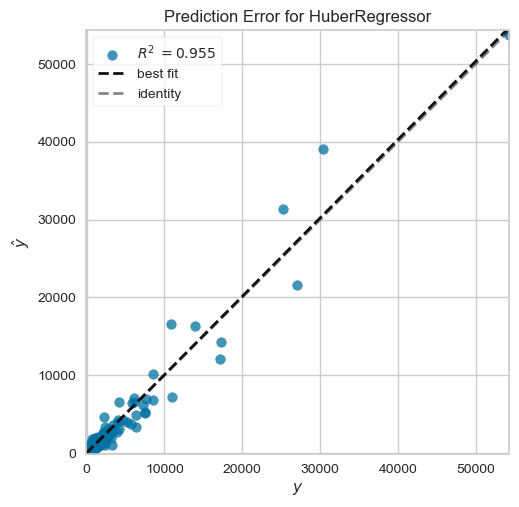

In [76]:
plot_model(best_model, plot='error')

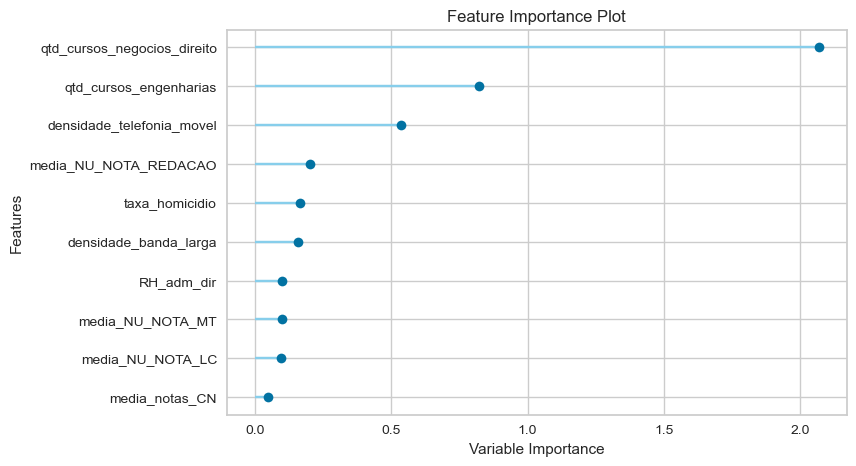

In [77]:
plot_model(best_model, plot='feature')

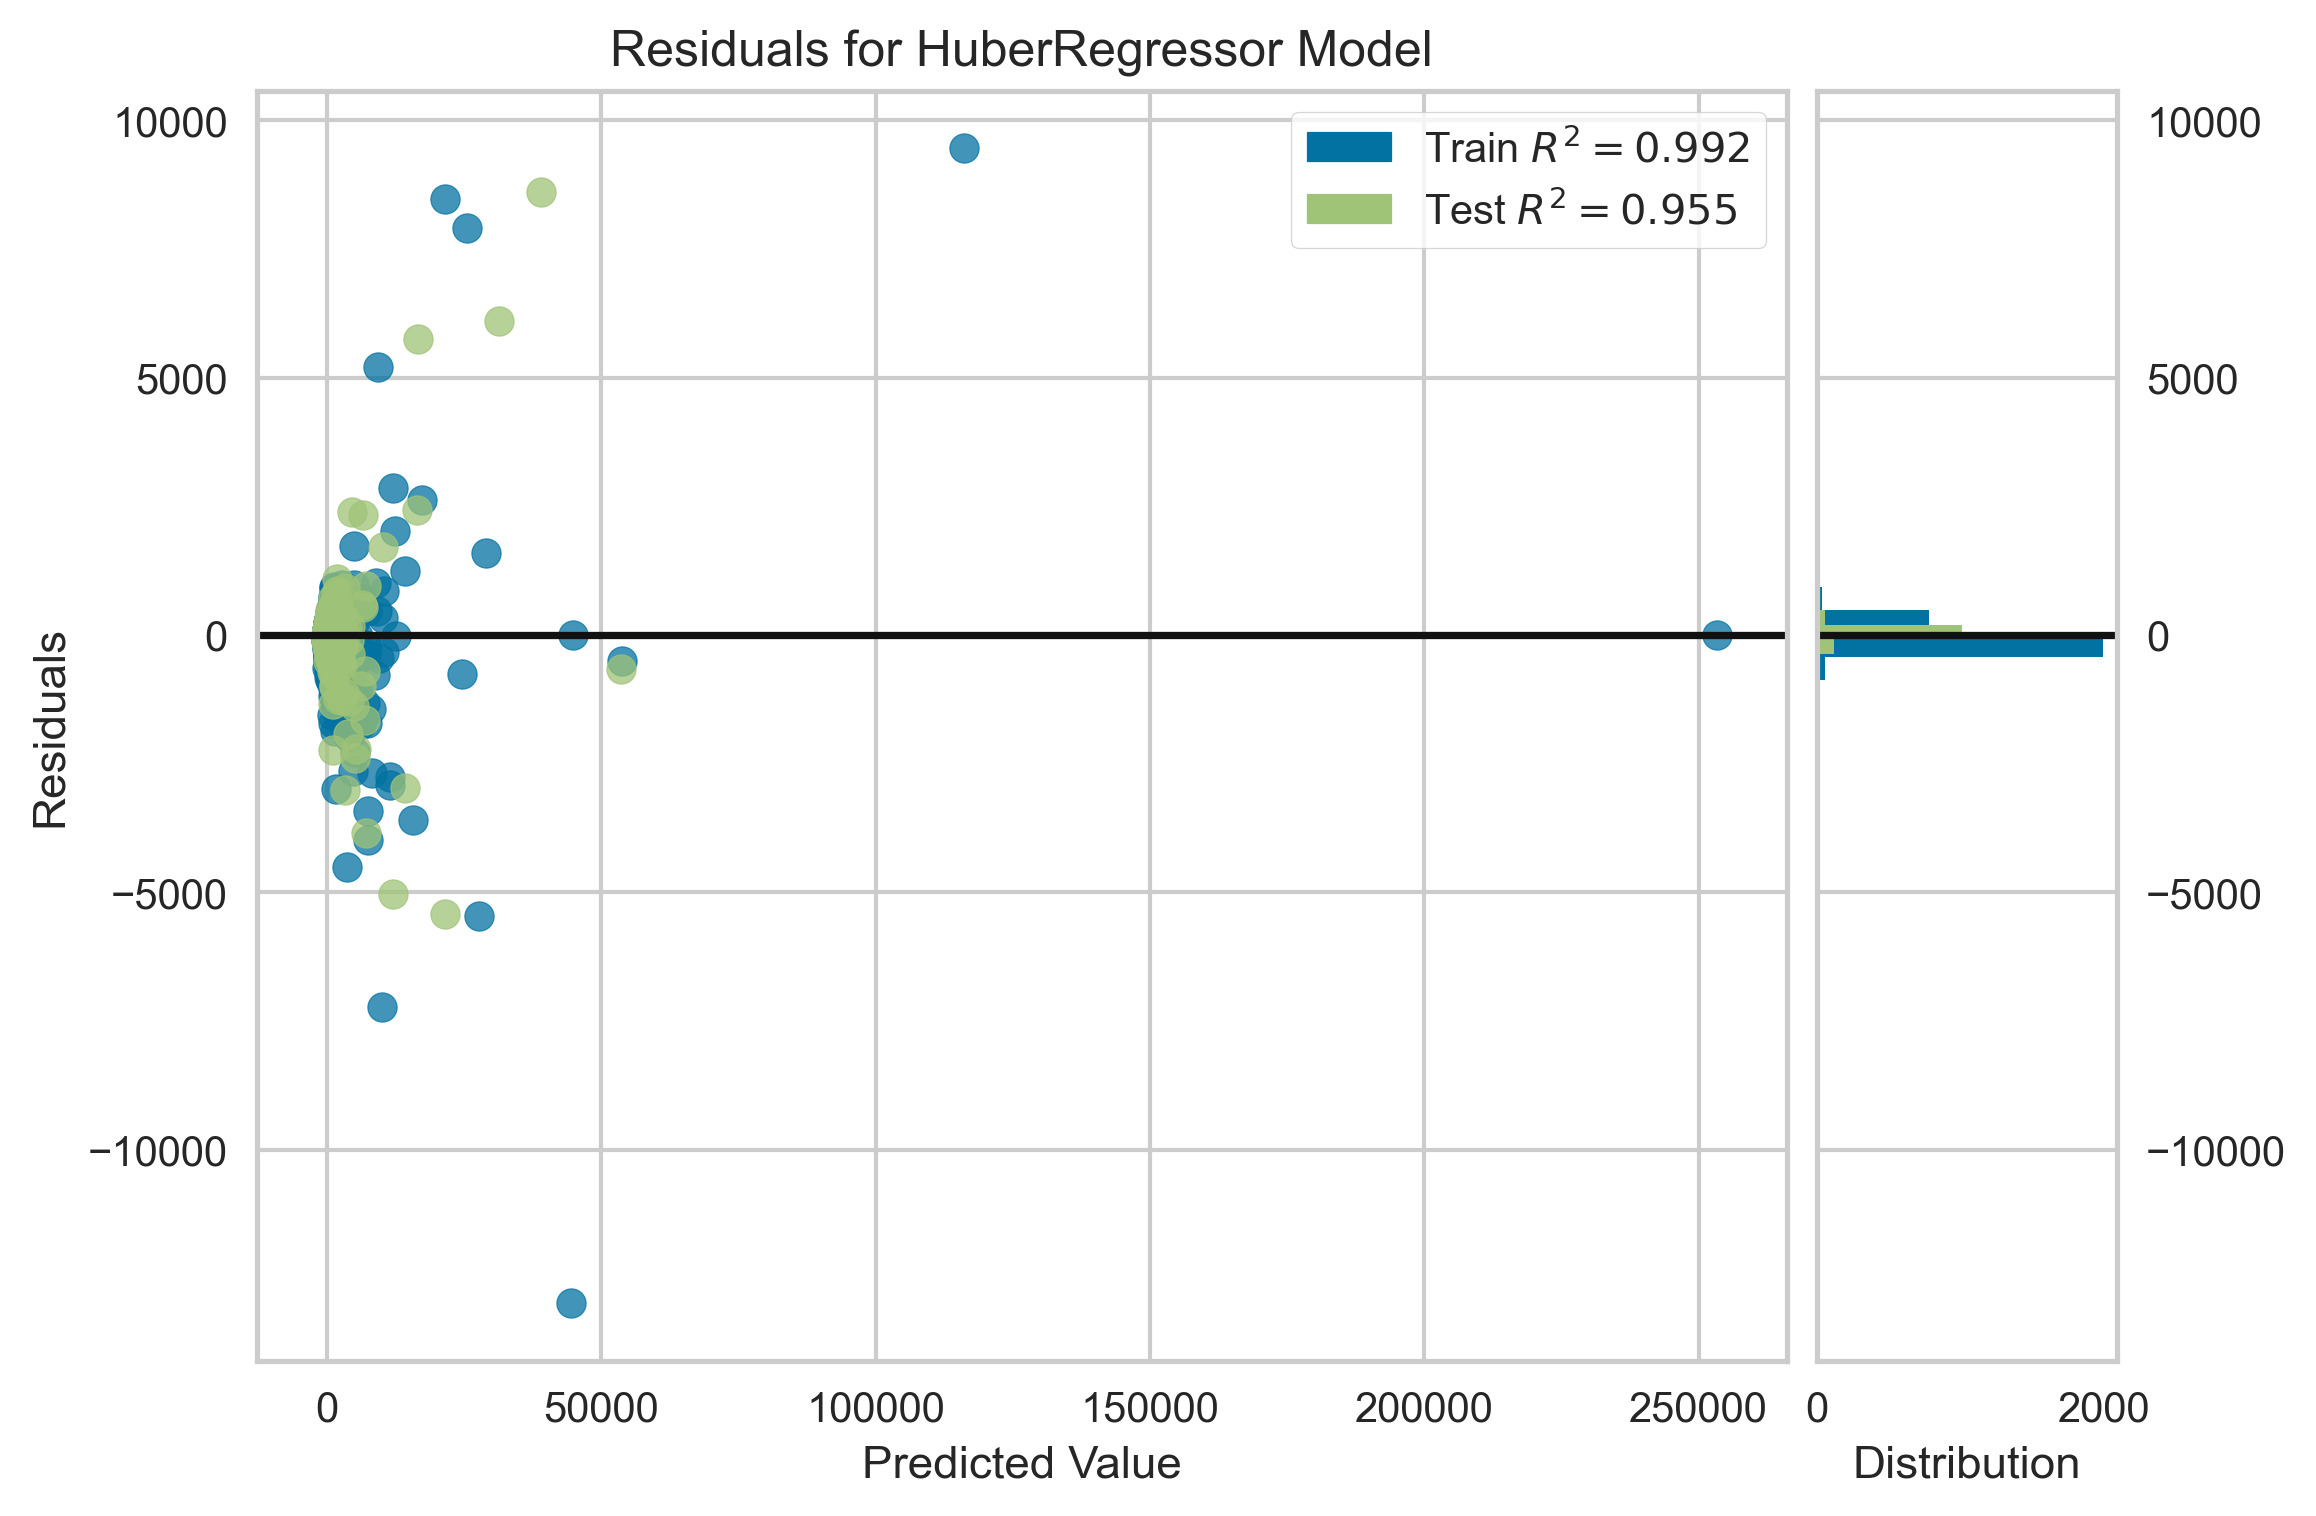

In [78]:
plot_model(best_model, plot='residuals',  scale = 3)

### Tunando o modelo

In [80]:
# em alguns tutoriais vi que não fizeram nenhuma modificação manual dos parametros, e eles já modificavam. 
#Esse parece que não conteceu do mesmo jeito. 

tuned = tune_model(best_model, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,141.0645,329320.7964,573.8648,0.9861,0.7124,0.6766
1,153.0118,375921.3360,613.1242,0.8817,0.6539,0.6034
2,150.4280,497575.6228,705.3904,0.9446,0.6997,0.7065
3,89.7567,55087.6462,234.7076,0.9367,0.6430,0.6916
4,155.8591,543075.1470,736.9363,0.9954,0.7712,0.8733
Mean,138.0240,360196.1097,572.8047,0.9489,0.6960,0.7103
Std,24.6397,171236.4535,179.1394,0.0406,0.0459,0.0889


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [98]:
#estranho, era para monstrar o que foi testado de diferente com o tuned, parece que esta igual.
#Sem falar que os resultados parecem piores depois de tunar 

print(tuned)

HuberRegressor(alpha=0.5, epsilon=1.7)


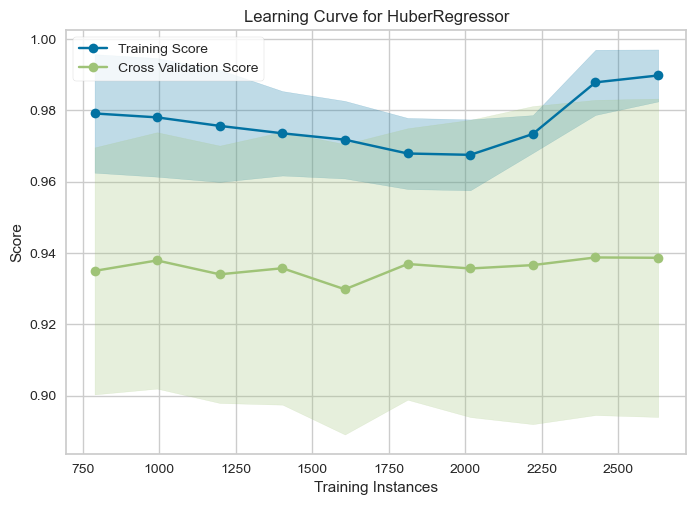

In [81]:
plot_model(tuned, plot = 'learning')  #use_train_data = True

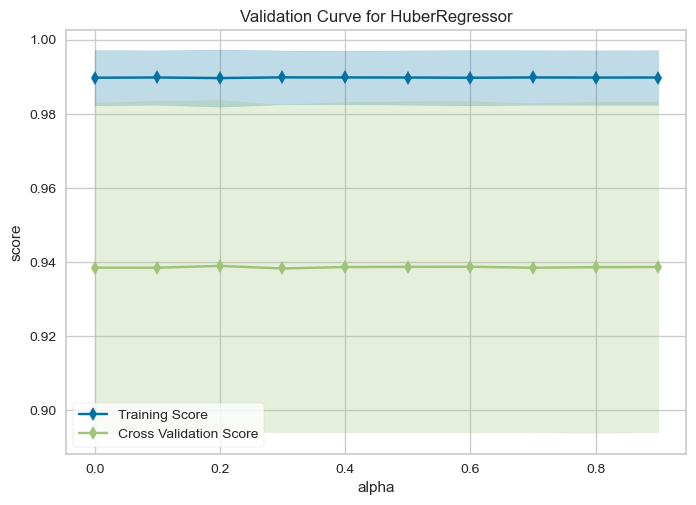

In [82]:
# Validation Curve
plot_model(tuned, plot='vc')


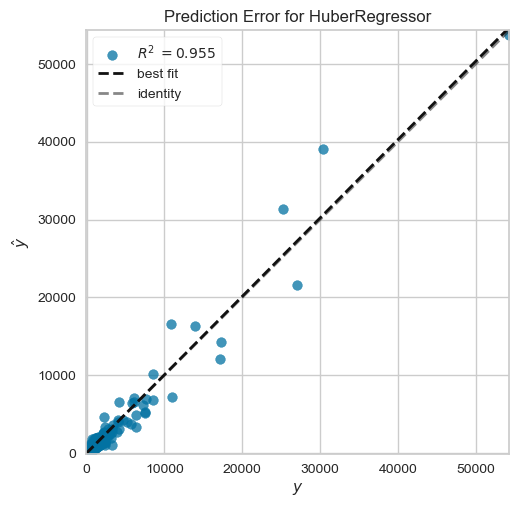

In [83]:
plot_model(tuned, plot='error')

# O R² esta bem baixo 

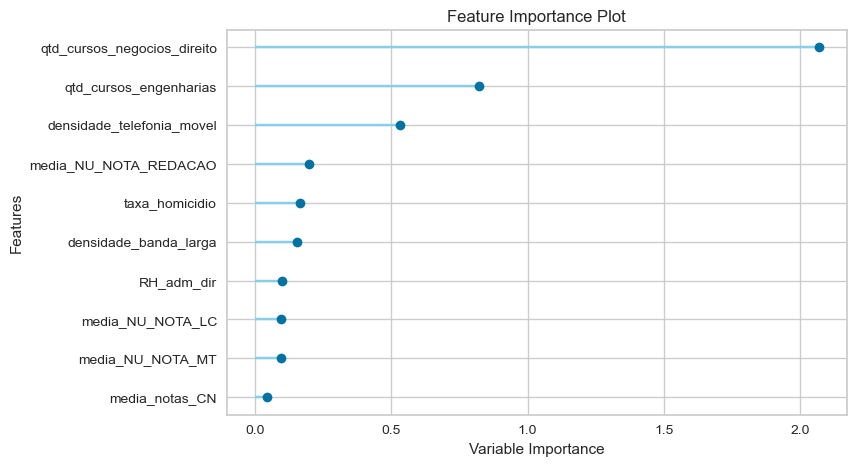

In [84]:
plot_model(tuned, plot='feature')

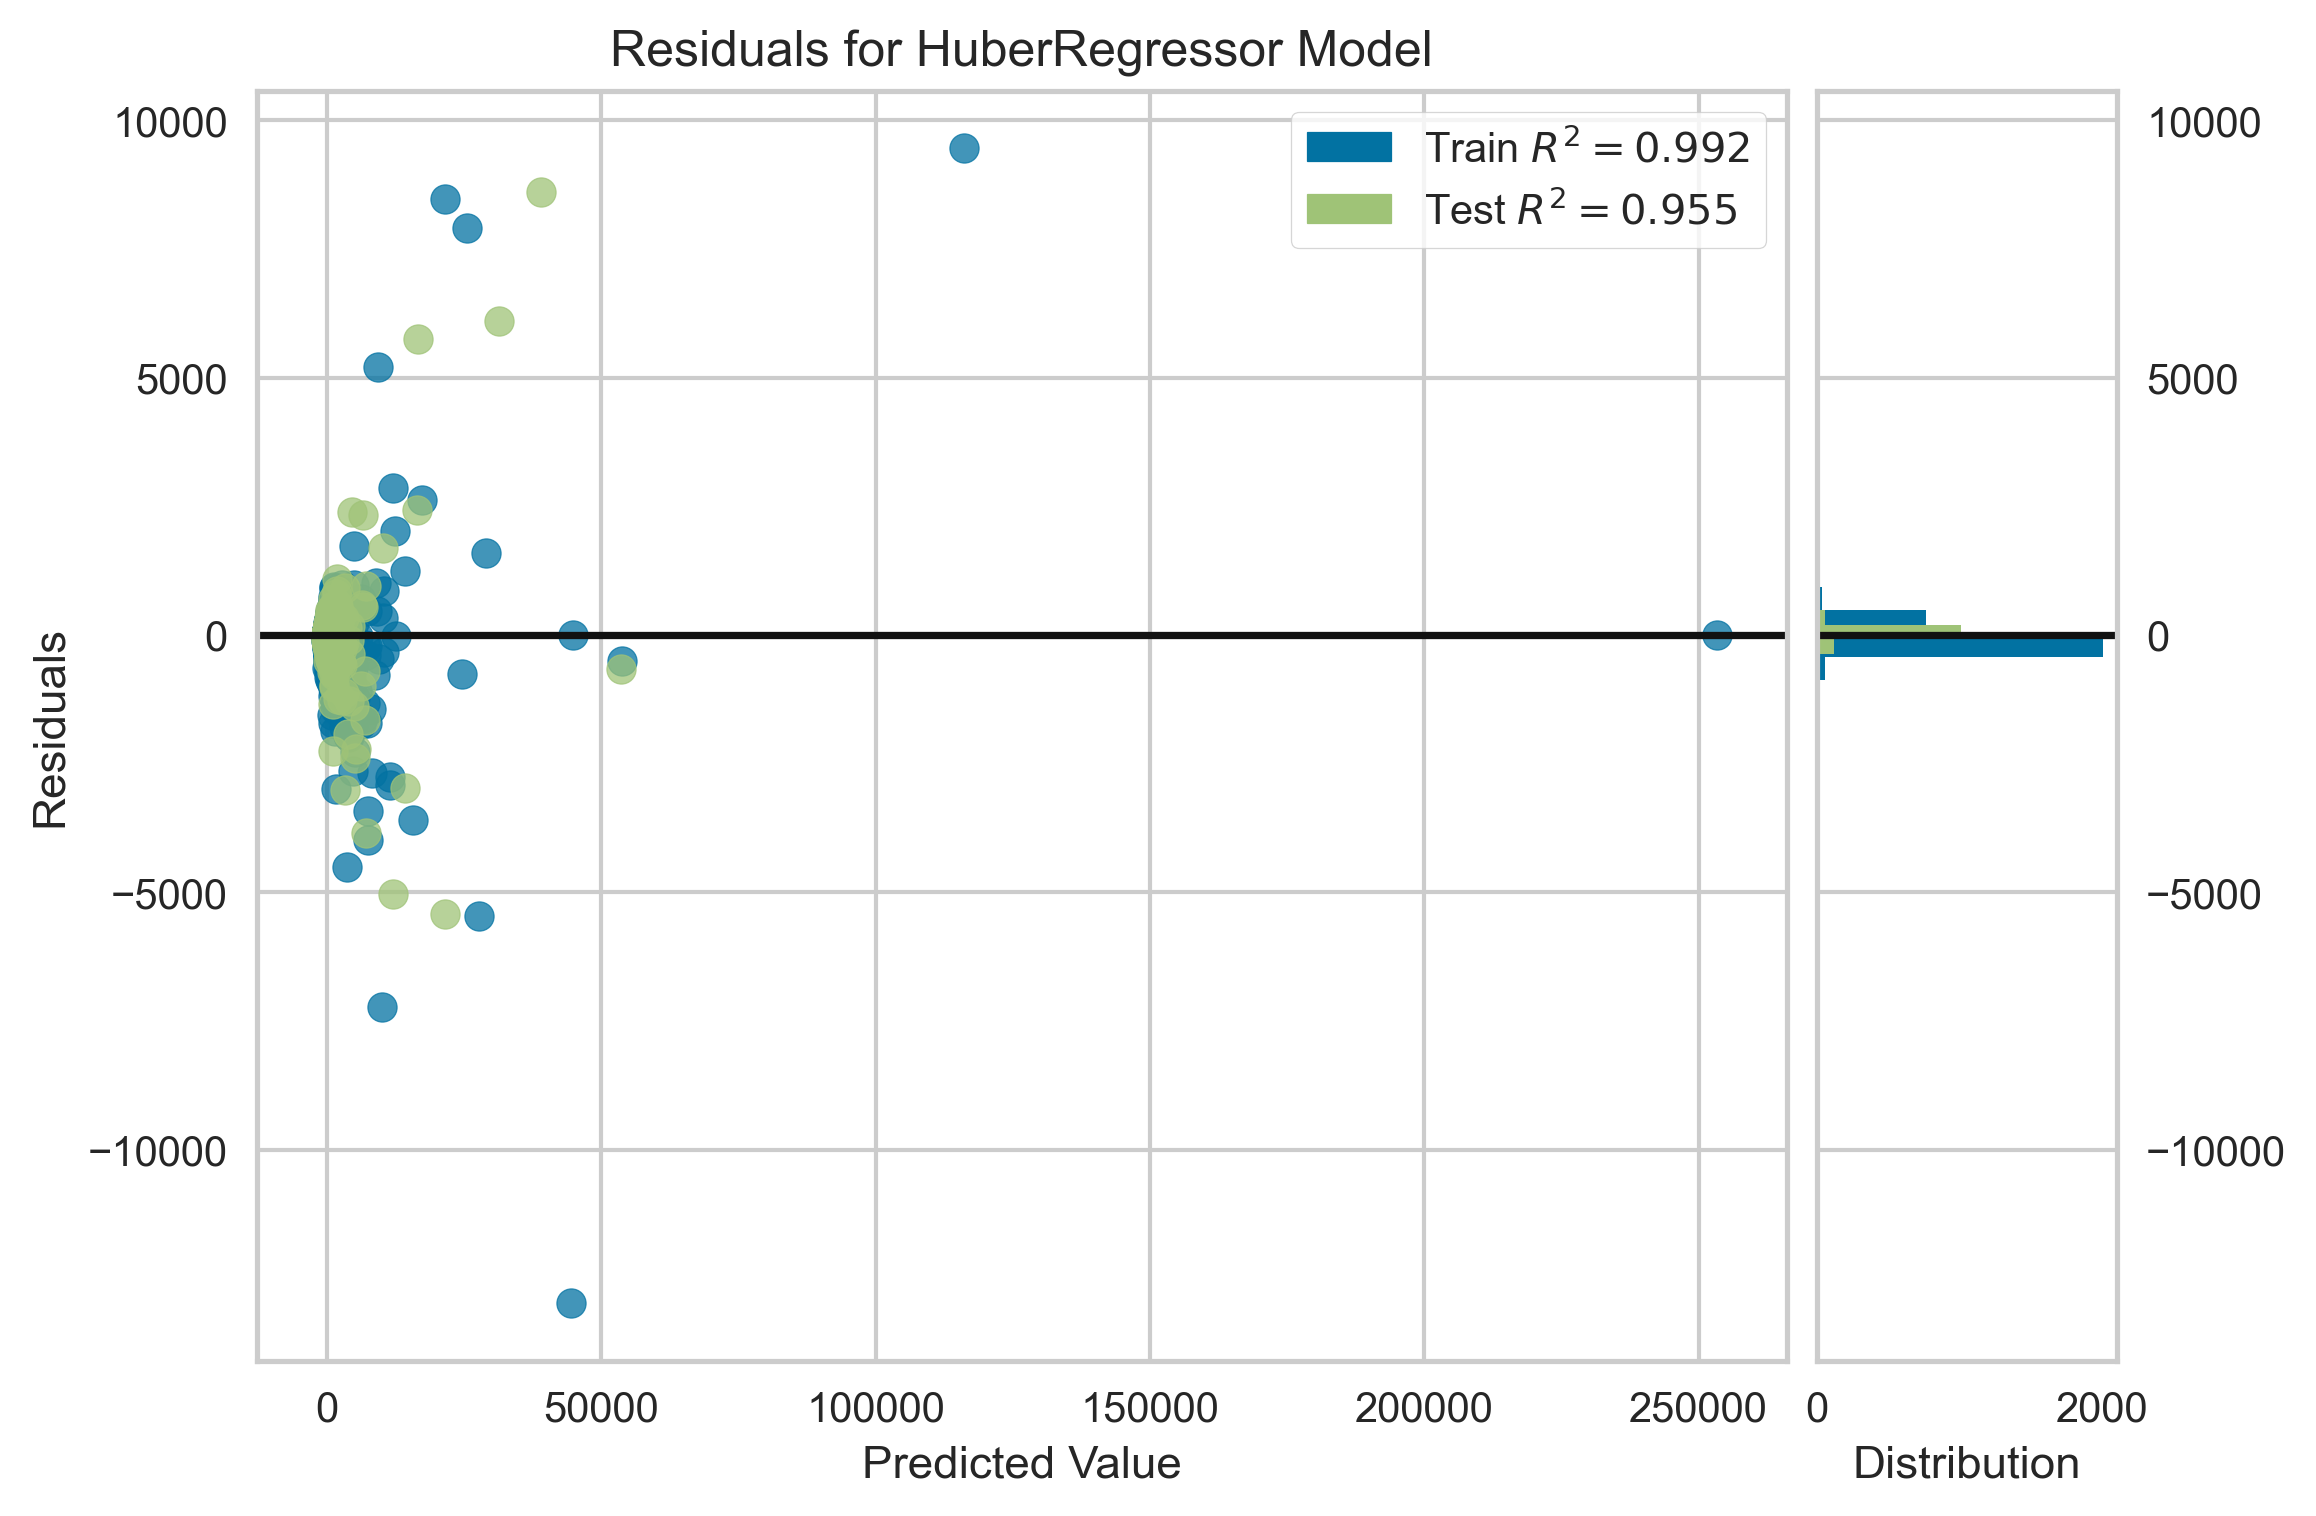

In [85]:
plot_model(tuned, plot='residuals',  scale = 3)

#os resultados parecem muito distantes uns dos outros 

In [94]:
final_model_baseline = finalize_model(tuned)

### Previsão

In [144]:
pred_treino = predict_model(final_model_baseline, data = treino)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,131.7326,258644.3471,508.5709,0.9890,0.7048,0.7478


In [145]:
pred_treino

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
270660,6.0,0.0,0.463208,33.152462,0.0,0.0,395.628571,422.762512,445.825012,436.742859,...,0,0,0,0,1,0,0,0,33,50.239255
316730,0.0,186.0,12.130569,67.534187,0.0,0.0,490.662506,527.674988,496.262512,539.212524,...,0,0,0,0,0,1,0,0,26,12.849264
251278,0.0,260.0,8.554277,66.133064,0.0,0.0,444.866669,473.833344,443.799988,451.933319,...,0,1,1,0,1,0,0,0,15,-3.476766
430870,0.0,226.0,30.952818,88.121902,0.0,0.0,488.318176,497.261536,469.307678,565.990906,...,0,0,0,0,0,0,0,0,74,102.689113
314920,0.0,369.0,5.450562,94.467270,0.0,0.0,469.000000,452.000000,449.950012,554.099976,...,0,0,0,0,0,0,0,0,37,51.653274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355030,454.0,127721.0,32.097408,125.004189,12809.0,52259.0,515.010742,548.616333,534.100159,581.029175,...,0,0,0,1,0,0,1,0,253408,253407.766344
291080,264.0,5937.0,11.146967,125.226761,494.0,1546.0,497.371368,523.909973,509.181915,543.344971,...,0,0,0,0,0,0,0,0,9589,10386.017573
430510,86.0,7345.0,34.121548,101.562866,484.0,1699.0,520.229065,556.289062,535.819946,581.916504,...,0,0,0,0,0,0,1,0,9898,9435.673314


Text(0, 0.5, 'Valores preditos')

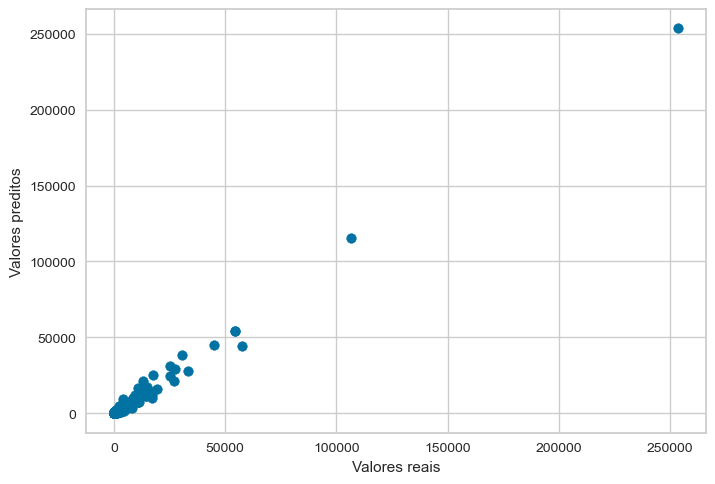

In [146]:
plt.scatter(pred_treino['qtd_abertas_Empresario_Individual'],pred_treino['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')

Previsão de dados não vistos

In [95]:
pred_unseen = predict_model(final_model_baseline, data = teste)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,122.8559,134040.6877,366.1157,0.9622,0.6865,0.7617


In [96]:
pred_unseen

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110005,3.0,591.0,8.540527,108.074341,4.0,35.0,479.268738,477.045715,454.722870,480.696869,...,0,0,0,0,1,0,0,0,257,244.431312
110007,1.0,382.0,3.261486,51.545662,0.0,0.0,439.184601,466.414276,432.535706,445.276917,...,0,1,0,1,0,0,0,0,86,38.251022
110008,3.0,573.0,4.388471,35.367435,5.0,12.0,438.418182,465.692108,451.828949,478.290924,...,1,1,0,0,1,0,0,0,106,184.035830
110011,10.0,1484.0,20.346228,101.132721,8.0,114.0,472.343292,501.169189,481.437683,507.111206,...,0,0,0,0,0,0,1,0,617,749.728184
110013,6.0,1214.0,7.779695,56.914486,3.0,26.0,460.839630,482.138611,470.749115,485.543396,...,0,0,0,1,1,0,0,0,279,445.707551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522100,5.0,195.0,2.852253,103.565315,0.0,0.0,464.779999,487.066681,474.000000,520.359985,...,0,0,0,0,0,0,0,0,41,52.918899
522119,4.0,271.0,10.329089,116.298340,0.0,0.0,435.885712,480.299988,450.257141,503.938110,...,0,1,0,0,0,1,0,0,108,112.937606
522190,0.0,184.0,9.433472,78.092514,0.0,0.0,426.950012,483.766663,451.266663,422.950012,...,0,0,0,0,0,1,0,0,30,114.281526


Text(0, 0.5, 'Valores preditos')

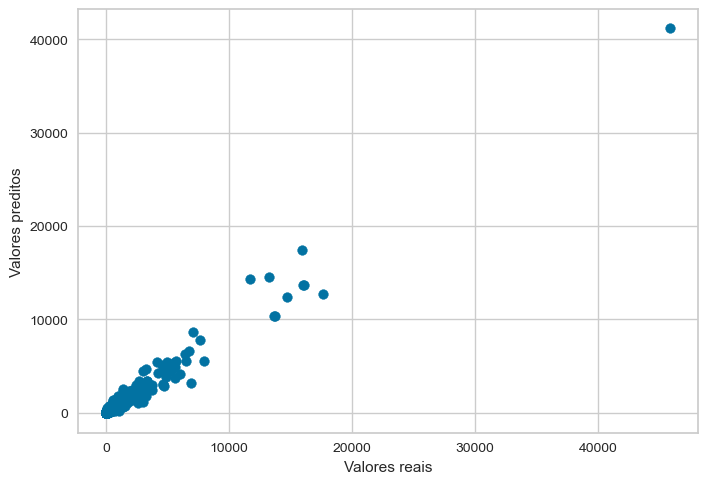

In [97]:
plt.scatter(pred_unseen['qtd_abertas_Empresario_Individual'],pred_unseen['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')